     V1    V2
0  4.30  0.80
1  3.95  0.80
2  3.95  0.75
3  3.85  0.85
4  4.30  0.80


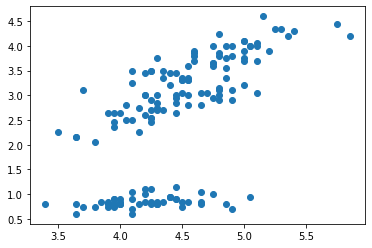

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.cluster import adjusted_rand_score



# Importing CSV File
url = 'https://raw.githubusercontent.com/varuncj02/Coding-Challenge/master/ClusterPlot.csv'

df1 = pd.read_csv(url)
df1.drop('Unnamed: 0', axis = 1, inplace = True)

# To make it more generic if any misplaced or empty values then data processed
df1.fillna(method ='ffill', inplace = True) 

plt.scatter(df1["V1"], df1["V2"])
print(df1.head())



In [123]:
#Determining the Ideal Epsilon Value using the Elbow method
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(df1)
distances, indices = nbrs.kneighbors(df1)

print(distances)

[[0.         0.        ]
 [0.         0.05      ]
 [0.         0.05      ]
 [0.         0.05      ]
 [0.         0.        ]
 [0.         0.1118034 ]
 [0.         0.05      ]
 [0.         0.05      ]
 [0.         0.07071068]
 [0.         0.        ]
 [0.         0.05      ]
 [0.         0.1       ]
 [0.         0.05      ]
 [0.         0.15811388]
 [0.         0.1118034 ]
 [0.         0.25      ]
 [0.         0.05      ]
 [0.         0.05      ]
 [0.         0.1118034 ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.1       ]
 [0.         0.05      ]
 [0.         0.1118034 ]
 [0.         0.05      ]
 [0.         0.1       ]
 [0.         0.05      ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.05      ]
 [0.         0.1118034 ]
 [0.         0.        ]
 [0.         0.1       ]
 [0.         0.1       ]
 [0.         0.        ]
 [0.         0.07071068]
 [0.         0.05      ]


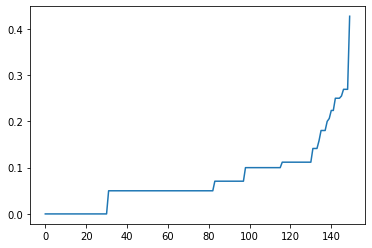

In [124]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [185]:
#Epsilon Value will be the value at the maximum curvature in this case that value being around (0.27-0.32)
#For ease of use epsilon value of 0.3 is selected

m = DBSCAN(eps= 0.3, min_samples= 3)
m.fit(df1, 3)




DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


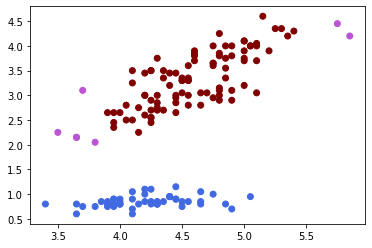

In [184]:
clusters = m.labels_

print(clusters)
colors = ['royalblue', 'maroon', 'mediumorchid'] #, 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(df1['V1'], df1['V2'], c=vectorizer(clusters))



